In [1]:
from model_network import *

import networkx as nx

import sys
#!{sys.executable} -m pip install [arg]

from itertools import product
from scipy.stats import gengamma


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [136]:
min_w  = []
mean_w = []
var_w  = []
max_w  = []

pc_vals = [0.3, 0.4, 0.5, 0.6]

for pc in pc_vals:
    W, I, communities, risk, success = simulation(NUM_AGENTS=1000, STEPS=30, PROJECT_COST=pc)
    min_w.append(min(W[-1]))
    max_w.append(max(W[-1]))
    mean_w.append(np.mean(W[-1]))
    var_w.append(np.var(W[-1]))

214 communities.


100%|██████████| 30/30 [00:32<00:00,  1.08s/it]


226 communities.


100%|██████████| 30/30 [00:45<00:00,  1.53s/it]


200 communities.


100%|██████████| 30/30 [00:39<00:00,  1.31s/it]


215 communities.


100%|██████████| 30/30 [00:29<00:00,  1.02it/s]


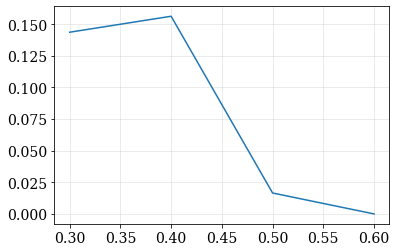

In [143]:
plt.plot(pc_vals, min_w)
plt.show()

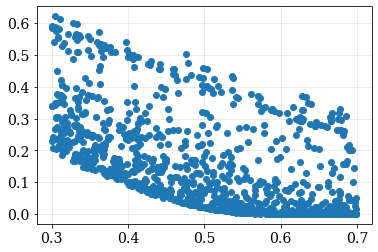

In [131]:
plt.scatter(risk, W[-1,:])

201 communities.


100%|██████████| 20/20 [00:20<00:00,  1.04s/it]


(64.42258137576921, 2.4380073803704816, -1.6802597660952463, 0.39367559454124545)

207 communities.


100%|██████████| 20/20 [00:22<00:00,  1.15s/it]


(0.006903275737520476, 169.61136301281857, -0.003114497342783705, 0.8338878615377587)

222 communities.


100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


(0.6032844759064546, 1.0927996040060393, 1.7626143148584432e-06, 0.25724500689879737)



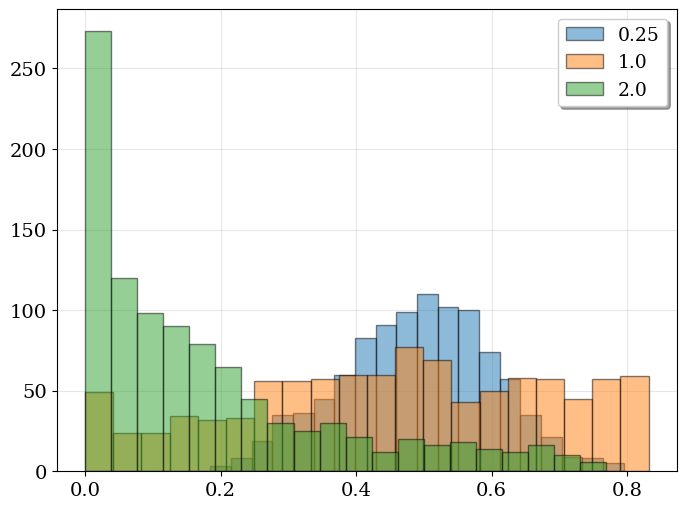

In [246]:
for cost in [0.25, 1.0, 2.0]:
    W, I, communities, risk, success = simulation(NUM_AGENTS=1000, STEPS=20, PROJECT_COST=cost)
    params = gengamma.fit(W[-1])
    print(params)
    plt.hist(W[-1], edgecolor="k", bins=20, alpha=0.5, label=cost)
    print()
    
plt.legend(shadow=True)
plt.show()

In [30]:
c = count_crossover_points(W, communities=communities)

213 communities.


100%|██████████| 100/100 [01:38<00:00,  1.02it/s]


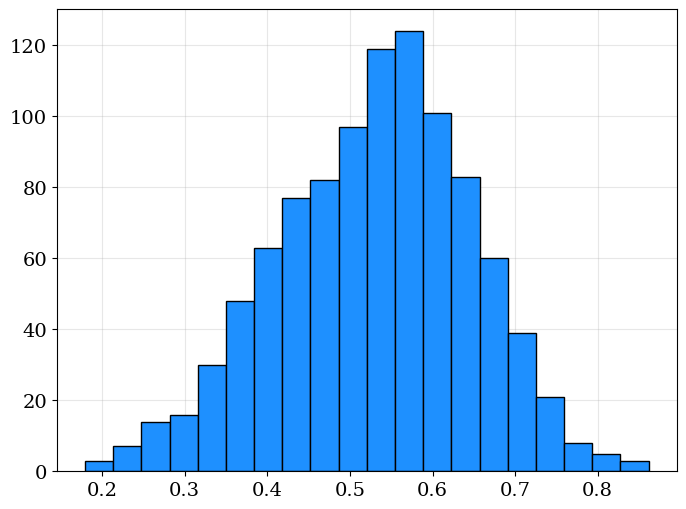

222 communities.


100%|██████████| 100/100 [01:53<00:00,  1.13s/it]


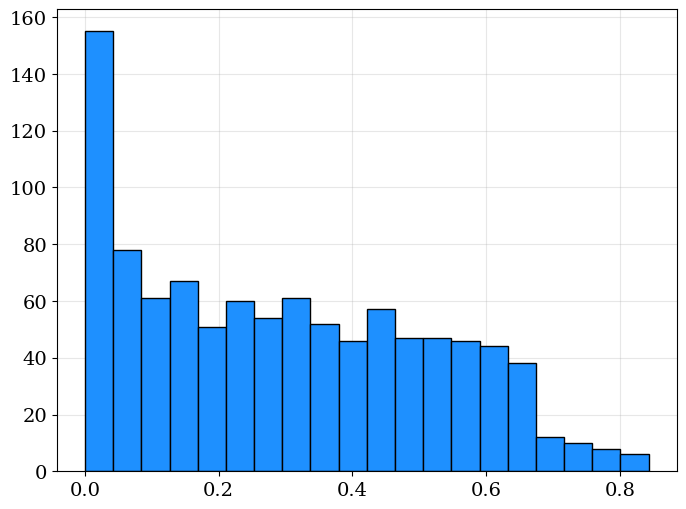

207 communities.


100%|██████████| 100/100 [01:48<00:00,  1.09s/it]


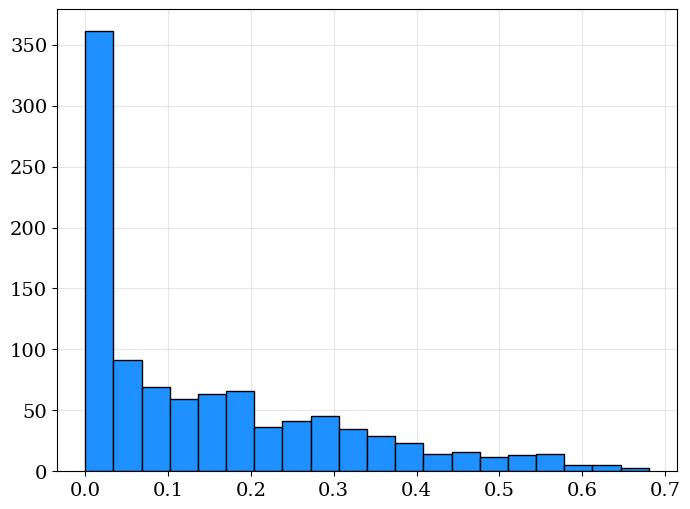

In [163]:
for pc in [0.2, 1.0, 5.0]:
    W, communities, R = simulation(NUM_AGENTS=1000, STEPS=100, PROJECT_COST=pc)
    plt.hist(W[-1], color="dodgerblue", edgecolor="k", bins=20)
    plt.show()

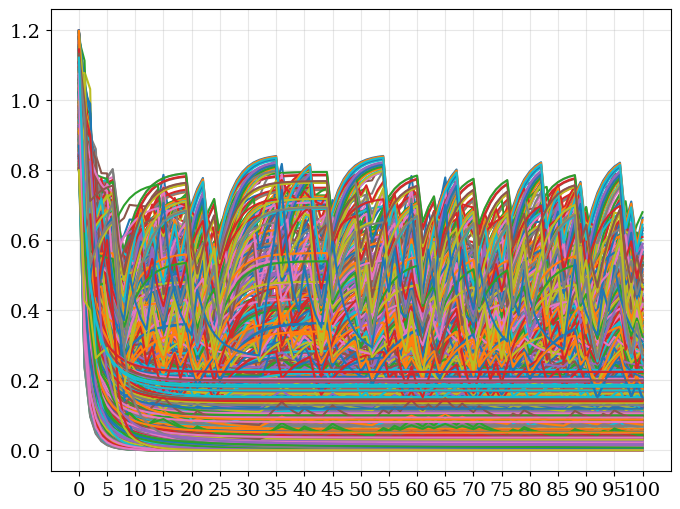

In [164]:
for i in range(W.shape[1]):
    plt.plot(W[:,i])

plt.xticks(np.arange(0, len(W), 5))
plt.show()

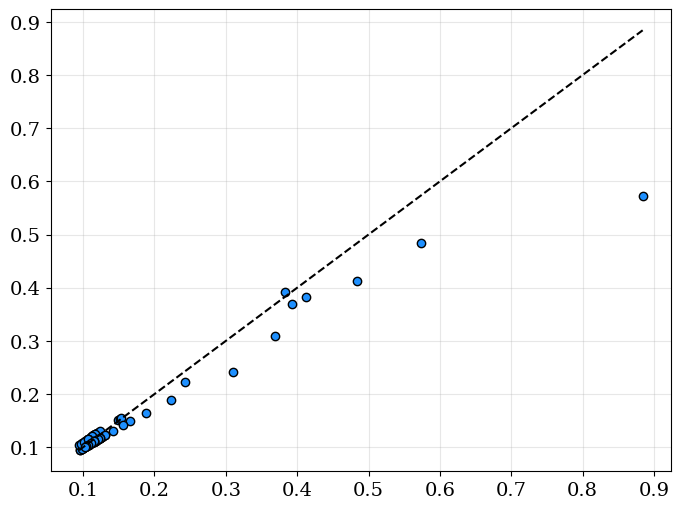

In [177]:
i = 12

x=[]
y=[]
for k in range(len(W)-1):
    x.append(W[k][i])
    y.append(W[k+1][i])

plt.scatter(x,y, color="dodgerblue", edgecolor="k")
plt.plot(np.linspace(min(x), max(x), 100), np.linspace(min(x), max(x), 100), color="k", linestyle="dashed")
plt.show()